LSTM Stock Price Predictor

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers
from datetime import datetime, timedelta

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Load and prepare historical data
def prepare_stock_data(ticker, train_start='2010-01-01', train_end='2020-12-31',
                      val_start='2021-01-01', val_end='2023-01-01'):
    data = yf.download(ticker, start=train_start, end=val_end)

    training_data = data['Close'][train_start:train_end]
    validation_data = data['Close'][val_start:val_end]

    training_set = training_data.values.reshape(-1, 1)
    validation_set = validation_data.values.reshape(-1, 1)

    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    validation_set_scaled = sc.transform(validation_set)

    X_train, y_train = create_sequences(training_set_scaled)
    X_validation, y_validation = create_sequences(validation_set_scaled)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

    return X_train, y_train, X_validation, y_validation, sc, data

# Build and train LSTM model
def build_and_train_model(X_train, y_train, X_validation, y_validation, epochs=100, batch_size=32):
    model = models.Sequential()
    model.add(layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=50, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=50, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=50))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_validation, y_validation),
        verbose=1
    )

    return model, history

# Plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to get the latest data and prepare it for prediction
def prepare_latest_data(ticker, sc, seq_length=60):
    # Get the current date
    today = datetime.now().strftime('%Y-%m-%d')

    # Calculate the date range needed for sequence preparation
    start_date = (datetime.now() - timedelta(days=seq_length * 2)).strftime('%Y-%m-%d')

    # Download the latest data
    latest_data = yf.download(ticker, start=start_date, end=today)

    # Take the last 'seq_length' data points
    latest_prices = latest_data['Close'].values.reshape(-1, 1)
    latest_prices_scaled = sc.transform(latest_prices)

    # Create the input sequence
    X_latest = []
    X_latest.append(latest_prices_scaled[-seq_length:, 0])
    X_latest = np.array(X_latest)
    X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

    return X_latest, latest_data


[*********************100%***********************]  1 of 1 completed


Running prediction for S&P500...
Loading and preparing ^GSPC data...
Building and training LSTM model...
Epoch 1/100



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0481 - val_loss: 0.0201
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - val_loss: 0.0146
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - val_loss: 0.0082
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - val_loss: 0.0072
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0023 - val_loss: 0.0190
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021 - val_loss: 0.0134
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0

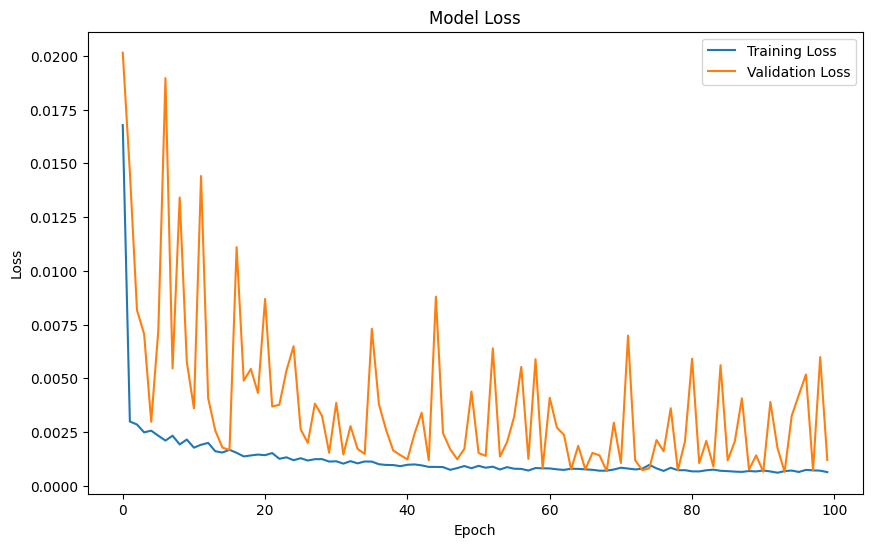

[*********************100%***********************]  1 of 1 completed

Preparing latest ^GSPC data for prediction...
Getting sentiment analysis for ^GSPC...
Predicting prices for the next 12 months with sentiment adjustment...


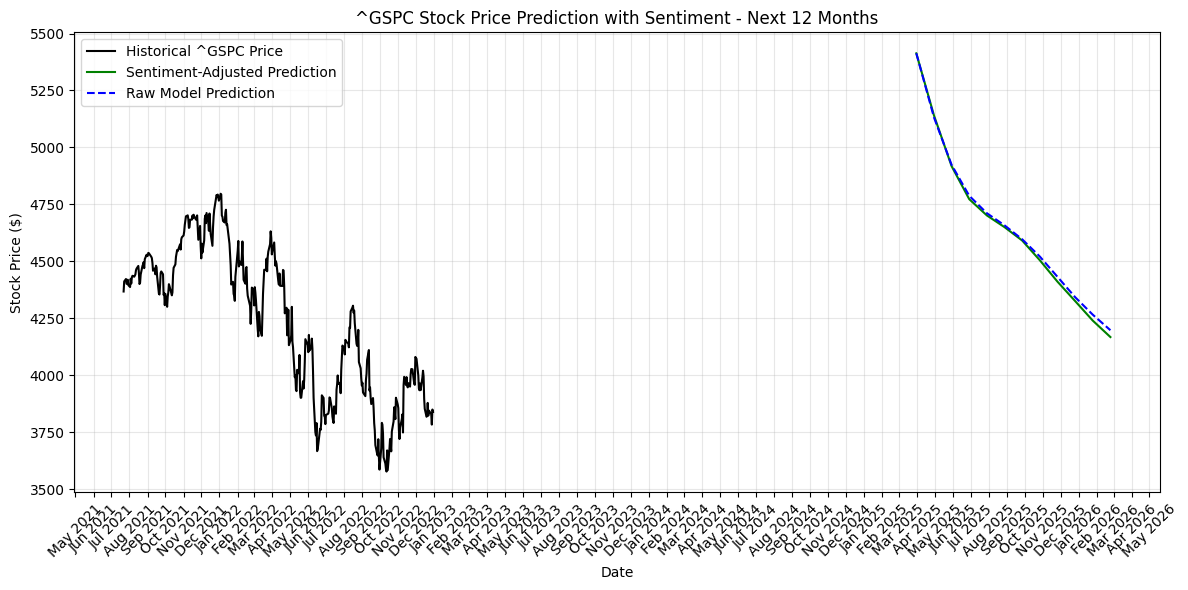


^GSPC Monthly Price Predictions with Sentiment Analysis:
----------------------------------------------------------------------
Month           Raw Prediction  Sentiment       Adjusted Price 
----------------------------------------------------------------------
Mar 2025        $5413.43        -0.01           $5412.93       
Apr 2025        $5132.11        0.10            $5140.64       
May 2025        $4923.53        -0.07           $4917.68       
Jun 2025        $4787.66        -0.20           $4772.74       
Jul 2025        $4711.12        -0.13           $4701.39       
Aug 2025        $4657.85        -0.11           $4649.95       
Sep 2025        $4596.74        -0.08           $4591.29       
Oct 2025        $4520.97        -0.23           $4504.72       
Nov 2025        $4431.90        -0.31           $4410.72       
Dec 2025        $4342.67        -0.26           $4325.56       
Jan 2026        $4265.71        -0.40           $4239.72       
Feb 2026        $4197.47        

ValueError: too many values to unpack (expected 2)

In [6]:

# # Function to predict next 12 months
# def predict_next_12_months(model, X_latest, sc, seq_length=60):
#     # Start with the latest sequence
#     current_sequence = X_latest[0]

#     # List to store predictions
#     predictions = []

#     # Current date for reference
#     current_date = datetime.now()
#     future_dates = []

#     # Make predictions for the next 12 months
#     for i in range(12):
#         # Month-end date (approximate - using 30 days for simplicity)
#         future_date = (current_date + timedelta(days=30 * (i + 1)))
#         future_dates.append(future_date)

#         # Reshape for prediction
#         current_batch = current_sequence[-seq_length:].reshape(1, seq_length, 1)

#         # Predict next value
#         next_pred = model.predict(current_batch, verbose=0)

#         # Store the prediction
#         predictions.append(next_pred[0, 0])

#         # Update sequence for next prediction (rolling window)
#         current_sequence = np.append(current_sequence, next_pred[0, 0])

#     # Convert predictions back to original scale
#     predictions_array = np.array(predictions).reshape(-1, 1)
#     predictions_rescaled = sc.inverse_transform(predictions_array)

#     return predictions_rescaled, future_dates

# # Function to plot historical data and future predictions
# def plot_predictions(historical_data, predictions, future_dates, ticker):
#     plt.figure(figsize=(12, 6))

#     # Plot historical data
#     plt.plot(historical_data.index[-365:], historical_data['Close'][-365:],
#              color='black', label=f'Historical {ticker} Price')

#     # Plot predictions
#     plt.plot(future_dates, predictions, color='green', label=f'Predicted {ticker} Price')

#     plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#     plt.xticks(rotation=45)
#     plt.title(f'{ticker} Stock Price Prediction - Next 12 Months')
#     plt.xlabel('Date')
#     plt.ylabel('Stock Price ($)')
#     plt.legend()
#     plt.tight_layout()
#     plt.grid(True, alpha=0.3)
#     plt.show()

# def print_monthly_predictions(predictions, future_dates, ticker):
#     print(f"\n{ticker} Monthly Price Predictions:")
#     print("-" * 40)
#     print(f"{'Month':<15} {'Predicted Price':<15}")
#     print("-" * 40)

#     for i in range(len(predictions)):
#         month_str = future_dates[i].strftime('%b %Y')
#         price_str = f"${predictions[i][0]:.2f}"
#         print(f"{month_str:<15} {price_str:<15}")

# # Main execution function
# def run_stock_prediction(ticker='AAPL'):
#     print(f"Loading and preparing {ticker} data...")
#     X_train, y_train, X_validation, y_validation, scaler, historical_data = prepare_stock_data(ticker)

#     print("Building and training LSTM model...")
#     model, history = build_and_train_model(X_train, y_train, X_validation, y_validation)

#     # Plot training results
#     plot_loss(history)

#     print(f"Preparing latest {ticker} data for prediction...")
#     latest_sequence, latest_data = prepare_latest_data(ticker, scaler)

#     print("Predicting prices for the next 12 months...")
#     predictions, future_dates = predict_next_12_months(model, latest_sequence, scaler)

#     # Plot predictions
#     plot_predictions(historical_data, predictions, future_dates, ticker)

#     # Print monthly predictions
#     print_monthly_predictions(predictions, future_dates, ticker)

#     return predictions, future_dates

# # Run the prediction for SPY first as in the example
# print("Running prediction for SPY...")
# spy_predictions, spy_dates = run_stock_prediction('SPY')

# # Run the prediction for AAPL as requested
# print("\nRunning prediction for AAPL...")
# aapl_predictions, aapl_dates = run_stock_prediction('AAPL')





def predict_next_12_months_with_sentiment(model, X_latest, sc, sentiment_scores=None, seq_length=60):
    """
    Predict stock prices for the next 12 months with sentiment adjustment

    Parameters:
    - model: Trained LSTM model
    - X_latest: Latest sequence of normalized prices
    - sc: Scaler used for normalization
    - sentiment_scores: List of sentiment scores for upcoming months (between -1 and 1)
                        None means no sentiment adjustment
    - seq_length: Length of input sequence

    Returns:
    - predictions_rescaled: Array of predicted prices
    - future_dates: List of future dates for predictions
    """
    # Start with the latest sequence
    current_sequence = X_latest[0]

    # List to store predictions
    predictions = []
    adjusted_predictions = []

    # Current date for reference
    current_date = datetime.now()
    future_dates = []

    # If no sentiment scores provided, use neutral sentiment
    if sentiment_scores is None:
        sentiment_scores = [0] * 12
    elif len(sentiment_scores) < 12:
        # Pad with zeros if not enough scores
        sentiment_scores = sentiment_scores + [0] * (12 - len(sentiment_scores))

    # Configure sentiment impact (how much sentiment affects price)
    sentiment_impact = 0.02  # 2% adjustment per sentiment unit

    # Make predictions for the next 12 months
    for i in range(12):
        # Month-end date (approximate - using 30 days for simplicity)
        future_date = (current_date + timedelta(days=30 * (i + 1)))
        future_dates.append(future_date)

        # Reshape for prediction
        current_batch = current_sequence[-seq_length:].reshape(1, seq_length, 1)

        # Predict next value
        next_pred = model.predict(current_batch, verbose=0)

        # Store the raw prediction
        predictions.append(next_pred[0, 0])

        # Apply sentiment adjustment
        sentiment_adjustment = 1 + (sentiment_scores[i] * sentiment_impact)
        adjusted_pred = next_pred[0, 0] * sentiment_adjustment

        # Store the adjusted prediction
        adjusted_predictions.append(adjusted_pred)

        # Update sequence with the adjusted prediction for next month's forecast
        current_sequence = np.append(current_sequence, adjusted_pred)

    # Convert predictions back to original scale
    predictions_array = np.array(adjusted_predictions).reshape(-1, 1)
    predictions_rescaled = sc.inverse_transform(predictions_array)

    # Also convert raw predictions for comparison if needed
    raw_predictions_array = np.array(predictions).reshape(-1, 1)
    raw_predictions_rescaled = sc.inverse_transform(raw_predictions_array)

    return predictions_rescaled, raw_predictions_rescaled, future_dates

# Function to plot historical data and future predictions with sentiment comparison
def plot_predictions_with_sentiment(historical_data, predictions, raw_predictions, future_dates, ticker):
    plt.figure(figsize=(12, 6))

    # Plot historical data
    plt.plot(historical_data.index[-365:], historical_data['Close'][-365:],
             color='black', label=f'Historical {ticker} Price')

    # Plot sentiment-adjusted predictions
    plt.plot(future_dates, predictions, color='green', label=f'Sentiment-Adjusted Prediction')

    # Plot raw predictions
    plt.plot(future_dates, raw_predictions, color='blue', linestyle='--',
             label=f'Raw Model Prediction')

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45)
    plt.title(f'{ticker} Stock Price Prediction with Sentiment - Next 12 Months')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

def print_monthly_predictions_with_sentiment(predictions, raw_predictions, future_dates, ticker, sentiment_scores=None):
    print(f"\n{ticker} Monthly Price Predictions with Sentiment Analysis:")
    print("-" * 70)
    print(f"{'Month':<15} {'Raw Prediction':<15} {'Sentiment':<15} {'Adjusted Price':<15}")
    print("-" * 70)

    if sentiment_scores is None:
        sentiment_scores = [0] * len(predictions)

    for i in range(len(predictions)):
        month_str = future_dates[i].strftime('%b %Y')
        raw_price_str = f"${raw_predictions[i][0]:.2f}"
        sentiment_str = f"{sentiment_scores[i]:.2f}"
        adj_price_str = f"${predictions[i][0]:.2f}"
        print(f"{month_str:<15} {raw_price_str:<15} {sentiment_str:<15} {adj_price_str:<15}")

# Function to get news sentiment for a ticker
def get_ticker_sentiment(ticker, months=12):
    """
    Placeholder function for news sentiment analysis
    In a real implementation, this would call a news API and analyze sentiment

    Parameters:
    - ticker: Stock symbol
    - months: Number of months to forecast sentiment

    Returns:
    - List of sentiment scores between -1 (very negative) and 1 (very positive)
    """
    import random
    # Generate slightly correlated sentiment scores (to simulate real-world correlation)
    sentiment_scores = []
    current = random.uniform(-0.5, 0.5)
    for _ in range(months):
        # Add some random walk to the sentiment
        current += random.uniform(-0.2, 0.2)
        # Clamp to range [-1, 1]
        current = max(-1, min(1, current))
        sentiment_scores.append(current)

    return sentiment_scores

# Modified main execution function with sentiment analysis
def run_stock_prediction_with_sentiment(ticker='^GSPC'):
    print(f"Loading and preparing {ticker} data...")
    X_train, y_train, X_validation, y_validation, scaler, historical_data = prepare_stock_data(ticker)

    print("Building and training LSTM model...")
    model, history = build_and_train_model(X_train, y_train, X_validation, y_validation)

    # Plot training results
    plot_loss(history)

    print(f"Preparing latest {ticker} data for prediction...")
    latest_sequence, latest_data = prepare_latest_data(ticker, scaler)

    print(f"Getting sentiment analysis for {ticker}...")
    sentiment_scores = get_ticker_sentiment(ticker)

    print("Predicting prices for the next 12 months with sentiment adjustment...")
    predictions, raw_predictions, future_dates = predict_next_12_months_with_sentiment(
        model, latest_sequence, scaler, sentiment_scores)

    # Plot predictions
    plot_predictions_with_sentiment(historical_data, predictions, raw_predictions, future_dates, ticker)

    # Print monthly predictions
    print_monthly_predictions_with_sentiment(predictions, raw_predictions, future_dates, ticker, sentiment_scores)

    return predictions, raw_predictions, future_dates, sentiment_scores

# print("Running prediction for SPY...")
# spy_predictions, spy_dates = run_stock_prediction_with_sentiment('SPY')

print("\nRunning prediction for S&P500...")
aapl_predictions, aapl_dates = run_stock_prediction_with_sentiment('^GSPC')